# Imports

In [136]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
from copy import deepcopy
from sklearn.decomposition import PCA
import seaborn as sns

# A

In [137]:
file_path = 'MAll_Customers.csv'

df = pd.read_csv(file_path)

In [138]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [139]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state=10)

# B

In [140]:
X_train.drop(columns={'CustomerID'}, inplace=True)
X_test.drop(columns={'CustomerID'}, inplace=True)

# C

In [141]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


As you can see in the above table, we have all the information we wanted for this part of the project.

# D

In [142]:
numeric_columns = X_train.select_dtypes(include='number').columns

numeric_columns = numeric_columns[numeric_columns != 'Gender']

scaler = StandardScaler()

X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

In [143]:
X_train

,Gender,Age,Annual Income (k$),Spending Score (1-100)
190,Female,-0.403288,1.588527,-1.096618
7,Female,-1.205308,-1.641731,1.669888
26,Female,0.398731,-1.261701,-0.745934
138,Male,-1.496951,0.486439,-1.603161
58,Female,-0.913664,-0.577646,-0.005601
...,...,...,...,...
113,Male,-1.496951,0.106409,-0.200426
64,Male,1.711127,-0.501640,-0.005601
15,Male,-1.278219,-1.565725,1.085415
125,Female,-0.622021,0.334427,1.007486


# E

In [144]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [145]:
X_train['Gender'] = X_train['Gender'].map({'Female': 1, 'Male': 0})
X_test['Gender'] = X_test['Gender'].map({'Female': 1, 'Male': 0})

In [146]:
X_train

,Gender,Age,Annual Income (k$),Spending Score (1-100)
190,1,-0.403288,1.588527,-1.096618
7,1,-1.205308,-1.641731,1.669888
26,1,0.398731,-1.261701,-0.745934
138,0,-1.496951,0.486439,-1.603161
58,1,-0.913664,-0.577646,-0.005601
...,...,...,...,...
113,0,-1.496951,0.106409,-0.200426
64,0,1.711127,-0.501640,-0.005601
15,0,-1.278219,-1.565725,1.085415
125,1,-0.622021,0.334427,1.007486


# F

In [147]:
def kmeans_clustering(k, data, seed):

    kmeans = KMeans(n_clusters=k, random_state=seed)

    kmeans.fit(data)

    centers = kmeans.cluster_centers_

    labels = kmeans.labels_

    return centers, labels, kmeans

In [148]:
k = 3

centers, cluster_labels, _ = kmeans_clustering(k, X_train,11)

print("Centers of Clusters:")
print(centers)
print("\nCluster Labels:")
print(cluster_labels)

Centers of Clusters:
[[ 0.57333333  0.85661162  0.0212817  -0.6487814 ]
 [ 0.58333333 -0.48632565  0.9561987   1.18174512]
 [ 0.55102041 -0.95383976 -0.73508737  0.12481185]]

Cluster Labels:
[0 2 0 2 2 0 2 1 0 0 0 2 0 1 2 0 1 0 0 2 0 0 2 1 1 2 1 2 0 0 2 2 0 1 2 0 0
 0 0 2 0 2 0 0 2 2 0 2 2 0 2 2 0 2 0 2 2 2 1 0 2 1 0 1 2 2 2 1 1 0 1 1 0 0
 1 1 0 0 0 2 0 0 0 0 2 0 1 1 0 0 0 0 0 2 2 1 2 1 0 0 0 2 1 1 0 0 0 0 1 1 0
 0 2 1 0 1 0 0 2 0 0 2 2 0 0 0 0 0 0 1 0 1 2 0 1 1 2 0 1 0 2 0 1 2 2 2 0 0
 2 0 0 1 1 0 1 2 0 2 1 2]


c:\Users\mykar\Anaconda3\envs\anaconda-env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mykar\Anaconda3\envs\anaconda-env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# G

In [149]:
def kmeans_clustering_multirun(k, data, n_runs=20):

    best_distortion = np.inf
    best_centers = None
    best_labels = None

    for i in range(n_runs):
        centers, labels, kmeans = kmeans_clustering(k, data, i)
        distortion = kmeans.inertia_

        if distortion < best_distortion:
            best_distortion = distortion
            best_centers = centers
            best_labels = labels

    return best_centers, best_labels, kmeans

In [150]:
k_values = range(2, 11)

silhouette_scores = []
distortion_scores = []
best_kmeans = []

for k in k_values:
    _, labels, kmeans = kmeans_clustering_multirun(k, X_train)
    distortion = kmeans.inertia_

    silhouette = silhouette_score(X_train, labels)
    silhouette_scores.append(silhouette)
    distortion_scores.append(distortion)
    best_kmeans.append(kmeans)

c:\Users\mykar\Anaconda3\envs\anaconda-env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mykar\Anaconda3\envs\anaconda-env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mykar\Anaconda3\envs\anaconda-env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mykar\Anaconda3\envs\anaconda-env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less 

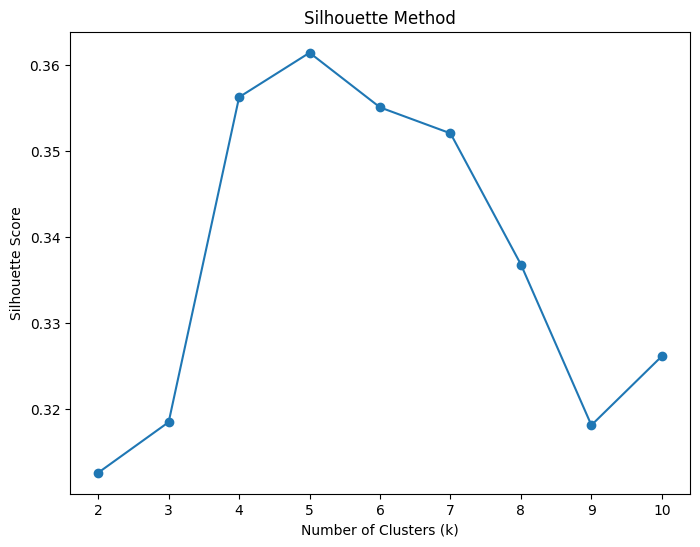

In [151]:
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

So the best number of clusters based on this method is 5 because it give us the most siljouette score.

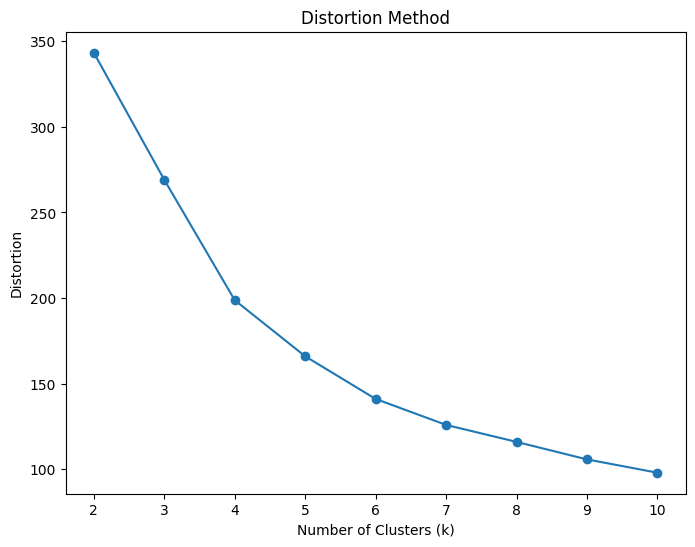

In [152]:
plt.figure(figsize=(8, 6))
plt.plot(k_values, distortion_scores, marker='o')
plt.title('Distortion Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

In [153]:
kl = KneeLocator(range(2, 11), distortion_scores, curve="convex", direction="decreasing")

print(f"Elbow is in K={kl.elbow}")

Elbow is in K=5


As you can see in the above plot, based on the elbow method, the best k is 5, because after that, we have a lower decrease rate.

# H

In [154]:
best_model = best_kmeans[3] # choose K=5

In [155]:
test_predict = best_model.predict(X_test)
test_predict

array([0, 1, 3, 4, 1, 1, 4, 0, 1, 3, 0, 3, 1, 4, 4, 0, 0, 1, 1, 2, 4, 4,
       1, 1, 0, 4, 4, 1, 1, 4, 2, 1, 0, 1, 1, 4, 2, 2, 0, 4])

In [156]:
test_data = deepcopy(X_test)
test_data['Cluster'] = test_predict
test_data

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
59,0,0.982018,-0.577646,-0.200426,0
5,1,-1.278219,-1.679734,0.968521,1
20,0,-0.330377,-1.413713,-0.629039,3
198,0,-0.549110,2.880630,-1.291442,4
52,1,-0.622021,-0.691655,0.111293,1
19,1,-0.330377,-1.451716,1.825748,1
162,0,-1.496951,0.752460,-1.797985,4
55,0,0.544553,-0.691655,-0.395250,0
69,1,-0.549110,-0.501640,-0.161461,1
2,1,-1.424040,-1.717737,-1.759021,3


# I

In [157]:
test_data.to_csv('predicts.csv', index=False)

# J

In [158]:
n_components = 2

pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

X_train_pca = pd.DataFrame(data=X_train_pca, columns=['PCA1', 'PCA2'])
X_test_pca = pd.DataFrame(data=X_test_pca, columns=['PCA1', 'PCA2'])

In [159]:
X_train_pca

,PCA1,PCA2
0,0.101223,1.589685
1,-1.595445,-2.061161
2,1.079920,-1.053502
3,-0.019350,0.375345
4,-0.489331,-0.755673
...,...,...
155,-0.899587,-0.171639
156,1.298460,-0.122491
157,-1.244198,-1.911753
158,-1.206629,0.060474


# K

In [160]:
centers, labels, best_model = kmeans_clustering_multirun(5, X_train_pca)

test_predict = best_model.predict(X_test_pca)

test_data['Cluster_PCA'] = test_predict
test_data

c:\Users\mykar\Anaconda3\envs\anaconda-env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mykar\Anaconda3\envs\anaconda-env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mykar\Anaconda3\envs\anaconda-env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mykar\Anaconda3\envs\anaconda-env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less 

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Cluster_PCA
59,0,0.982018,-0.577646,-0.200426,0,0
5,1,-1.278219,-1.679734,0.968521,1,2
20,0,-0.330377,-1.413713,-0.629039,3,4
198,0,-0.549110,2.880630,-1.291442,4,3
52,1,-0.622021,-0.691655,0.111293,1,2
19,1,-0.330377,-1.451716,1.825748,1,2
162,0,-1.496951,0.752460,-1.797985,4,0
55,0,0.544553,-0.691655,-0.395250,0,0
69,1,-0.549110,-0.501640,-0.161461,1,0
2,1,-1.424040,-1.717737,-1.759021,3,4


In [161]:
test_data.to_csv('predicts.csv', index=False)

# L

In [162]:
X_train_pca

,PCA1,PCA2
0,0.101223,1.589685
1,-1.595445,-2.061161
2,1.079920,-1.053502
3,-0.019350,0.375345
4,-0.489331,-0.755673
...,...,...
155,-0.899587,-0.171639
156,1.298460,-0.122491
157,-1.244198,-1.911753
158,-1.206629,0.060474


In [163]:
train_predict = best_model.predict(X_train_pca)
test_predict = best_model.predict(X_test_pca)

X_train_pca['Cluster'] = train_predict
X_test_pca['Cluster'] = test_predict

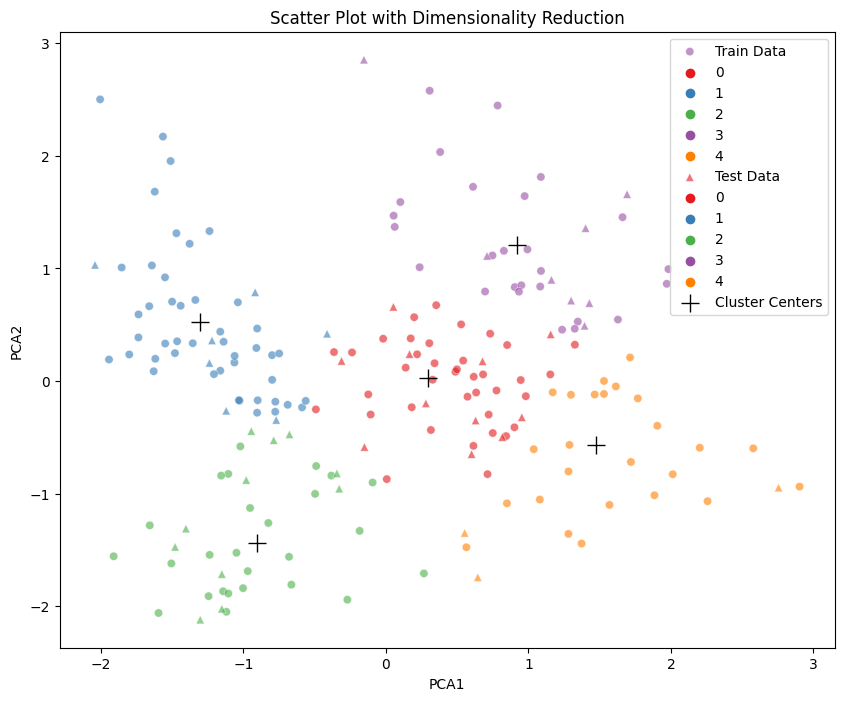

In [170]:
centers_df = pd.DataFrame(data=centers, columns=['PCA1', 'PCA2'])

plt.figure(figsize=(10, 8))

sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=X_train_pca, markers='o', alpha=0.6, label='Train Data', palette='Set1')

sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=X_test_pca, marker='^', alpha=0.6, color='red', label='Test Data', palette='Set1')

sns.scatterplot(x='PCA1', y='PCA2', data=centers_df, marker='+', color='black', s=150, label='Cluster Centers')

plt.title('Scatter Plot with Dimensionality Reduction')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()
